<a href="https://colab.research.google.com/github/ReshmaAjil/supermarket_analysis/blob/main/Supermarket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 5 # number of transactions

data = {
    "invoice_id": [f"INV{10000+i}" for i in range(n)],
    "date": pd.date_range(start="2024-01-01", periods=n, freq="H").date,
    "time": pd.date_range(start="08:00", periods=n, freq="H").time,
    "branch": np.random.choice(["A", "B", "C"], n),
    "city": np.random.choice(["Mumbai", "Delhi", "Bangalore"], n),
    "category": np.random.choice(
        ["Groceries", "Beverages", "Snacks", "Household", "Personal Care"], n
    ),
    "product": np.random.choice(
        ["Rice", "Milk", "Soap", "Biscuits", "Juice", "Oil", "Shampoo"], n
    ),
    "unit_price": np.round(np.random.uniform(20, 500), 2),
    "quantity": np.random.randint(1, 10, n),
    "discount_pct": np.random.choice([0, 5, 10, 15, 20], n),
    "customer_type": np.random.choice(["Member", "Normal"], n),
    "gender": np.random.choice(["Male", "Female"], n),
    "payment_method": np.random.choice(["Cash", "Card", "UPI"], n),
    "rating": np.round(np.random.uniform(4, 10), 1)
}

df = pd.DataFrame(data)

# Business calculations
df["gross_sales"] = df["unit_price"] * df["quantity"]
df["net_sales"] = df["gross_sales"] * (1 - df["discount_pct"] / 100)

df.head()

/tmp/ipython-input-3006337326.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "date": pd.date_range(start="2024-01-01", periods=n, freq="H").date,
/tmp/ipython-input-3006337326.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "time": pd.date_range(start="08:00", periods=n, freq="H").time,


,invoice_id,date,time,branch,city,category,product,unit_price,quantity,discount_pct,customer_type,gender,payment_method,rating,gross_sales,net_sales
0,INV10000,2024-01-01,08:00:00,C,Mumbai,Snacks,Oil,121.92,5,10,Normal,Female,Cash,5.0,609.60,548.640
1,INV10001,2024-01-01,09:00:00,A,Bangalore,Snacks,Juice,121.92,1,10,Member,Male,UPI,5.0,121.92,109.728
2,INV10002,2024-01-01,10:00:00,C,Delhi,Personal Care,Milk,121.92,6,5,Normal,Female,Cash,5.0,731.52,694.944
3,INV10003,2024-01-01,11:00:00,C,Bangalore,Household,Biscuits,121.92,9,15,Normal,Male,UPI,5.0,1097.28,932.688
4,INV10004,2024-01-01,12:00:00,A,Bangalore,Snacks,Oil,121.92,1,15,Member,Female,UPI,5.0,121.92,103.632


In [2]:
df.isnull().sum()
df.head()
df.shape

(5, 16)

In [3]:
#Fix date and time
df['date']=pd.to_datetime(df['date'])
df['date']

,date
0,2024-01-01
1,2024-01-01
2,2024-01-01
3,2024-01-01
4,2024-01-01


In [4]:
#Feature Engineering
#profit
df['profit']=df['net_sales']*0.7
df['disc_amt']=df['gross_sales']-df['net_sales']
df['day']=df['date'].dt.day
df.head()

,invoice_id,date,time,branch,city,category,product,unit_price,quantity,discount_pct,customer_type,gender,payment_method,rating,gross_sales,net_sales,profit,disc_amt,day
0,INV10000,2024-01-01,08:00:00,C,Mumbai,Snacks,Oil,121.92,5,10,Normal,Female,Cash,5.0,609.60,548.640,384.0480,60.960,1
1,INV10001,2024-01-01,09:00:00,A,Bangalore,Snacks,Juice,121.92,1,10,Member,Male,UPI,5.0,121.92,109.728,76.8096,12.192,1
2,INV10002,2024-01-01,10:00:00,C,Delhi,Personal Care,Milk,121.92,6,5,Normal,Female,Cash,5.0,731.52,694.944,486.4608,36.576,1
3,INV10003,2024-01-01,11:00:00,C,Bangalore,Household,Biscuits,121.92,9,15,Normal,Male,UPI,5.0,1097.28,932.688,652.8816,164.592,1
4,INV10004,2024-01-01,12:00:00,A,Bangalore,Snacks,Oil,121.92,1,15,Member,Female,UPI,5.0,121.92,103.632,72.5424,18.288,1


In [5]:
#Total sales
tot_sales=df['net_sales'].sum()
tot_sales
#total sales by category
tot_sales_by_category=df.groupby('category')['net_sales'].sum().sort_values(ascending=False)
tot_sales_by_category

,net_sales
category,
Household,932.688
Snacks,762.000
Personal Care,694.944


city
Bangalore    1146.048
Delhi         694.944
Mumbai        548.640
Name: net_sales, dtype: float64


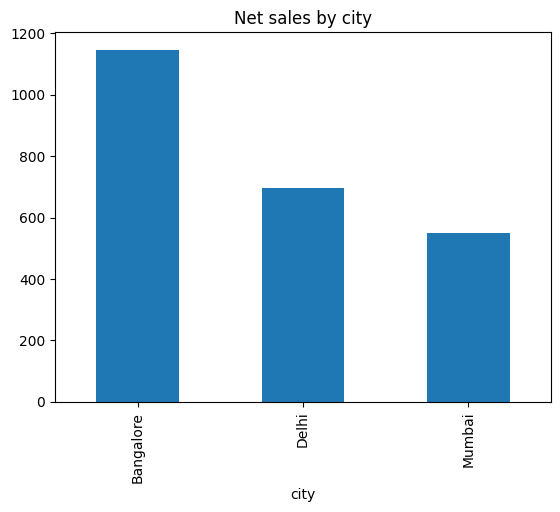

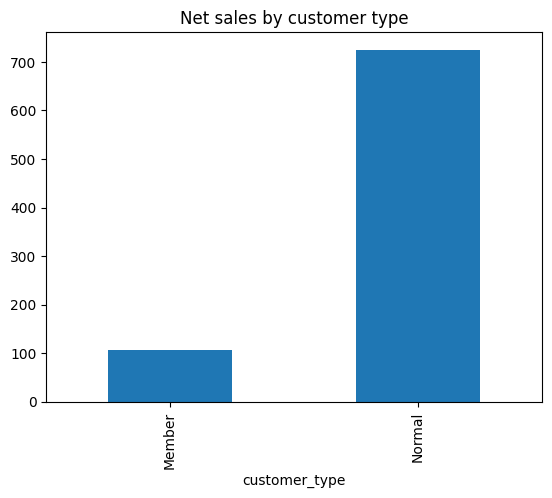

In [6]:


import matplotlib.pyplot as plt
df.head()
#which city performs the best
#total sales by city
tot_sales_by_category=df.groupby('city')['net_sales'].sum().sort_values(ascending=False)
print(tot_sales_by_category)
tot_sales_by_category.plot(kind='bar',title='Net sales by city')
plt.show()
#customer_type
cust_type_avg_sales=df.groupby('customer_type')['net_sales'].mean()
cust_type_avg_sales.plot(kind='bar',title='Net sales by customer type')
plt.show()

<Axes: title={'center': 'Net sales by category among cities'}, xlabel='city'>

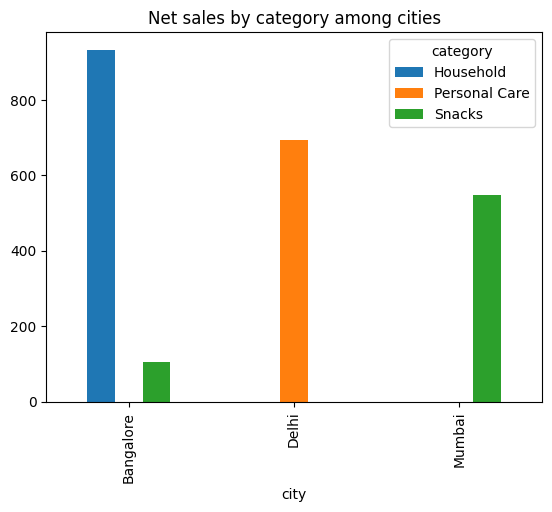

In [7]:
city_category_sales = pd.pivot_table(
    df,
    values='net_sales',
    index='city',
    columns='category',
    aggfunc='mean'
)

city_category_sales
city_category_sales.plot(kind='bar',title='Net sales by category among cities')

In [8]:
df.groupby(['city','category','customer_type'])['net_sales'].mean().unstack()#.sort_values(ascending =False)

customer_type            Member   Normal
city      category                      
Bangalore Household         NaN  932.688
          Snacks         106.68      NaN
Delhi     Personal Care     NaN  694.944
Mumbai    Snacks            NaN  548.640

### Manager Insight – Bangalore Household Category (Member Segment)

**Business Question:**  
Why is the Household category not generating purchases from member customers in Bangalore?

**Key Finding:**  
Member customer participation in the Household category in Bangalore is currently absent, indicating no observable conversion from this segment.

**Business Implication:**  
This gap suggests that the issue may be structural—such as low category visibility, suboptimal assortment, or misalignment with member purchase missions—rather than purely price-driven.

**Recommended Action:**  
Management should first assess shelf visibility, in-store placement, and product relevance for the Household category before considering targeted engagement mechanisms aimed at increasing basket contribution from regular customers.

**Limitation:**  
The analysis does not account for in-store behavior or merchandising practices, which may significantly influence conversion.
